# Integrale monodimesionale

Si vuole calcolare il valore del seguente integrale utilizzando un metodo Monte Carlo:
$$I = \frac{\pi}{2} \int_0^1\cos(\frac{\pi}{2} x) dx$$

Si ricorda che la stima di un integrale monodimensionale con un metodo Monte Carlo può essere ottenuta mediante:

$$G_n = (b-a) \frac{1}{n} \sum_{i=1}^n f(x_i) $$

dove $a$ e $b$ siano gli estremi di integrazione e vengono effettuate n stime di $f(x_i)$, una funzione proporzionale all'integranda, valutata in $x_i$ variabile casuale estratta secondo una distribuzione di probabilità p(x).

Si proceda al calcolo dell'integrale mediante:
- l'estrazione di $x_i$ secondo una distribuzione uniforme in [0,1);
- l'utilizzo del metodo di importance sampling applicato a piacere;

Inoltre, si attribuiscano alle stime errori statistici con il metodo delle medie a gruppi di n= [1,10,100,1000] gruppi.\
A tal proposito si costruiscono le seguenti funzioni.

In [1]:

import math


def Media (X, n) :              #attenzione: n è la posizione nell'array
    return sum( X[:n+1] )/(n+1)

def Err (X, n):             #attenzione n è la posizione nell'array, vale N=(n+1) ovvero (N-1)=n
    if n==0 :
        return 0
    return math.sqrt( (Media(X**2, n) - Media(X, n)**2) / n )


### - p(x) uniforme in [0,1)

Considerando una distribuzione $p(x)$ uniforme in [0,1), si importano 100 medie a blocchi della stima dell'integrale dato.

In [2]:

import numpy


X1, X10, X100, X1000= numpy.loadtxt( "2.1/sim_uniforme_out.txt", usecols= (0,1,2,3), delimiter= "\t", 
                                     unpack= 'true' )
    

Per ciascuna grandezza dei blocchi considerata si calcola la media progressiva sul totale dei blocchi considerati e l'errore (deviazione standard della media) associato.

Si producono, inoltre, dei grafici adeguati alla visualizzazione del risultato:

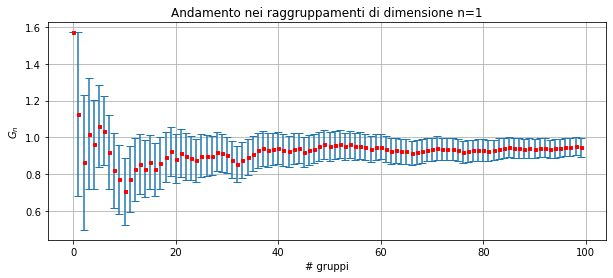

In [3]:

import matplotlib.pyplot as plt


Av1= numpy.zeros( numpy.size(X1) )
dev_Av1= numpy.zeros( numpy.size(X1) )

for i in range( numpy.size(X10) ):
    Av1[i]= Media (X1, i)
    dev_Av1[i]= Err (X1, i)
    
N = numpy.arange ( numpy.size(X1) )    

plt.figure(figsize=(10, 4))
plt.errorbar( N, Av1, yerr= dev_Av1, capsize= 4, marker= 's', mfc= 'red', mec= 'red', ms= 3, linestyle= "none")
plt.xlabel('# gruppi')
plt.ylabel('$G_n$')
plt.title('Andamento nei raggruppamenti di dimensione n=1')
plt.grid(True)
plt.show()


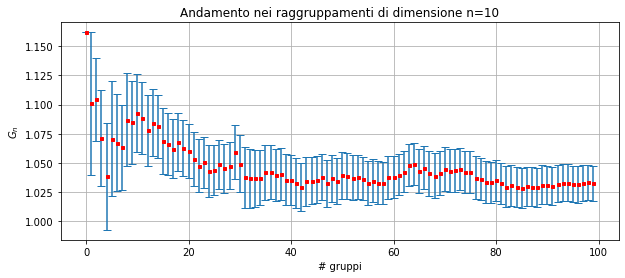

In [4]:

Av10= numpy.zeros( numpy.size(X10) )
dev_Av10= numpy.zeros( numpy.size(X10) )

for i in range( numpy.size(X10) ):
    Av10[i]= Media (X10, i)
    dev_Av10[i]= Err (X10, i)
    
plt.figure(figsize=(10, 4))
plt.errorbar( N, Av10, yerr= dev_Av10, capsize= 4, marker= 's', mfc= 'red', mec= 'red', ms= 3, linestyle= "none")
plt.xlabel('# gruppi')
plt.ylabel('$G_n$')
plt.title('Andamento nei raggruppamenti di dimensione n=10')
plt.grid(True)
plt.show()


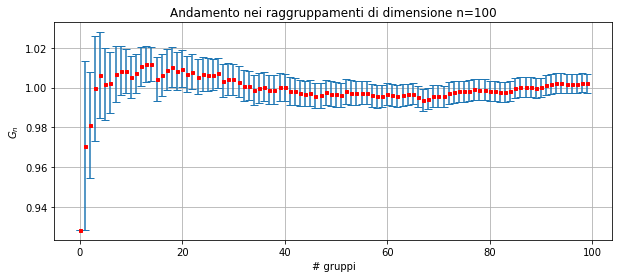

In [5]:

Av100= numpy.zeros( numpy.size(X100) )
dev_Av100= numpy.zeros( numpy.size(X100) )

for i in range( numpy.size(X100) ):
    Av100[i]= Media (X100, i)
    dev_Av100[i]= Err (X100, i)

plt.figure(figsize=(10, 4))
plt.errorbar( N, Av100, yerr= dev_Av100, capsize= 4, marker= 's', mfc= 'red', mec= 'red', ms= 3,
              linestyle= "none")
plt.xlabel('# gruppi')
plt.ylabel('$G_n$')
plt.title('Andamento nei raggruppamenti di dimensione n=100')
plt.grid(True)
plt.show()


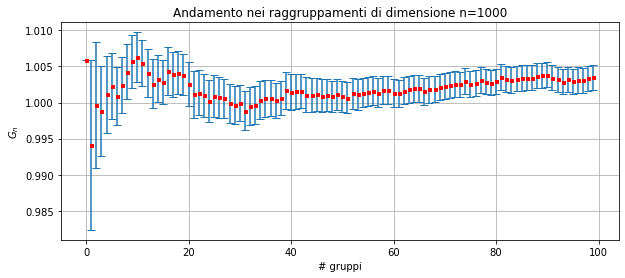

In [6]:

Av1000= numpy.zeros( numpy.size(X1000) )
dev_Av1000= numpy.zeros( numpy.size(X1000) )

for i in range( numpy.size(X1000) ):
    Av1000[i]= Media (X1000, i)
    dev_Av1000[i]= Err (X1000, i)

plt.figure(figsize=(10, 4))
plt.errorbar( N, Av1000, yerr= dev_Av1000, capsize= 4, marker= 's', mfc= 'red', mec= 'red', ms= 3,
              linestyle= "none")
plt.xlabel('# gruppi')
plt.ylabel('$G_n$')
plt.title('Andamento nei raggruppamenti di dimensione n=1000')
plt.grid(True)
plt.show()


Tutti i grafici riportati rivelano, con accuratezze diverse legate alla stima dell'errore con il metodo di media a blocchi, una compatibilità, entro i limiti di incertezza e di limite matematico, con il valore vero dell'integrale pari a 1. 

Come osservato nelle lezioni precedenti con l'aumento del numero di gruppi considerati la stima della deviazione standard della media decresce fino a stabilizzarsi almeno come ordine di grandezza.

### - p(x) arbitraria

Arbitrariamente, ricordando la forma nell'intervallo di integrazione [0,1] della funzione integranda $cos(\frac{\pi}{2}x)$ si propone come densità di probabilità una funzione proporzionale a:
$$\tilde p(x)= 1-x^2$$

Normalizzata $\tilde p(x)$, si può riscrivere dunque l'integrale come:
$$I = \frac{\pi}{2} \int_0^1\frac{2}{3} \ \frac{\cos(\frac{\pi}{2} x)}{3(1-x^2)} \ p(x) \ dx$$

Si desidererà dunque, posta $f(x)=\frac{2}{3} \ \frac{\cos(\frac{\pi}{2} x)}{3(1-x^2)}$, stimare la quantità $\sum_{i=1}^N f(x_i)$ dove $x_i$ sia estratto secondo p(x).

Si importano dunque, analogamente al caso precedente, i risulati della simulazione calcolando le osservabili statistiche di interesse e graficando.

In [7]:

Y1, Y10, Y100, Y1000= numpy.loadtxt( "2.1/sim_p(x)_out.txt", usecols= (0,1,2,3), delimiter= "\t", unpack= 'true' )
    

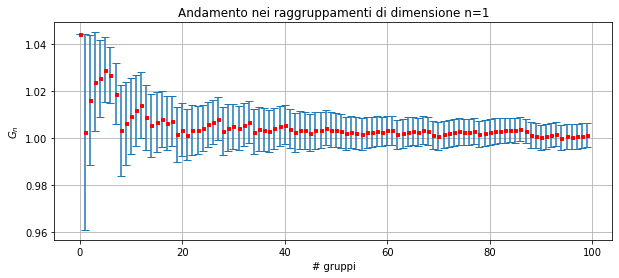

In [8]:

AvY1= numpy.zeros( numpy.size(Y1) )
dev_AvY1= numpy.zeros( numpy.size(Y1) )

for i in range( numpy.size(Y1) ):
    AvY1[i]= Media (Y1, i)
    dev_AvY1[i]= Err (Y1, i)

plt.figure(figsize=(10, 4))
plt.errorbar( N, AvY1, yerr= dev_AvY1, capsize= 4, marker= 's', mfc= 'red', mec= 'red', ms= 3, linestyle= "none")
plt.xlabel('# gruppi')
plt.ylabel('$G_n$')
plt.title('Andamento nei raggruppamenti di dimensione n=1')
plt.grid(True)
plt.show()


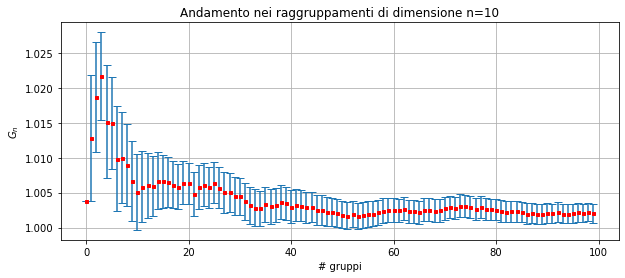

In [9]:

AvY10= numpy.zeros( numpy.size(Y10) )
dev_AvY10= numpy.zeros( numpy.size(Y10) )

for i in range( numpy.size(Y10) ):
    AvY10[i]= Media (Y10, i)
    dev_AvY10[i]= Err (Y10, i)

plt.figure(figsize=(10, 4))    
plt.errorbar( N, AvY10, yerr= dev_AvY10, capsize= 4, marker= 's', mfc= 'red', mec= 'red', ms= 3, linestyle= "none")
plt.xlabel('# gruppi')
plt.ylabel('$G_n$')
plt.title('Andamento nei raggruppamenti di dimensione n=10')
plt.grid(True)
plt.show()


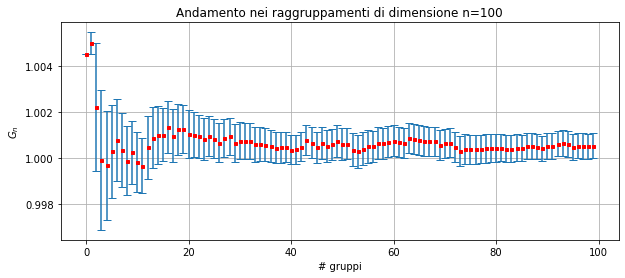

In [10]:

AvY100= numpy.zeros( numpy.size(Y100) )
dev_AvY100= numpy.zeros( numpy.size(Y100) )

for i in range( numpy.size(Y100) ):
    AvY100[i]= Media (Y100, i)
    dev_AvY100[i]= Err (Y100, i)

plt.figure(figsize=(10, 4))
plt.errorbar( N, AvY100, yerr= dev_AvY100, capsize= 4, marker= 's', mfc= 'red', mec= 'red', ms= 3, 
              linestyle= "none")
plt.xlabel('# gruppi')
plt.ylabel('$G_n$')
plt.title('Andamento nei raggruppamenti di dimensione n=100')
plt.grid(True)
plt.show()


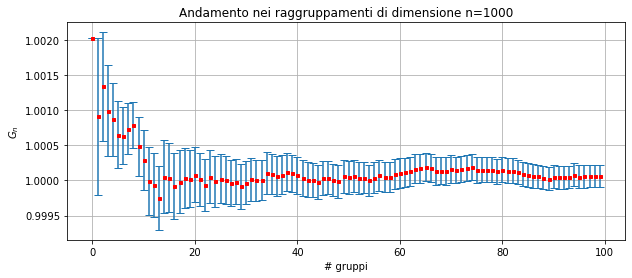

In [11]:

AvY1000= numpy.zeros( numpy.size(Y1000) )
dev_AvY1000= numpy.zeros( numpy.size(Y1000) )

for i in range( numpy.size(Y1000) ):
    AvY1000[i]= Media (Y1000, i)
    dev_AvY1000[i]= Err (Y1000, i)

plt.figure(figsize=(10, 4))
plt.errorbar( N, AvY1000, yerr= dev_AvY1000, capsize= 4, marker= 's', mfc= 'red', mec= 'red', ms= 3,
              linestyle= "none")
plt.xlabel('# gruppi')
plt.ylabel('$G_n$')
plt.title('Andamento nei raggruppamenti di dimensione n=1000')
plt.grid(True)
plt.show()


Si può osservare come rispetto ai casi con p(x) uniforme in [0,1) come molto prima il valore stimato dell'integrale converga al valore vero (pari a 1), e l'incertezza stimata, oltre a decrescere nel numero di raggruppamenti considerati, si attesta ad ordini di grandezza inferiori, modificando anche la scala dei grafici e l'accuratezza della stima ottenuta.

In [12]:
print("Uniforme in [0,1): ")
print("valore medio:", round(Av1000[99],3))
print("errore:      ", round(dev_Av1000[99],3))

Uniforme in [0,1): 
valore medio: 1.004
errore:       0.002


In [13]:
print ("p(x): ") 
print("valore medio:", round(AvY1000[99],4))
print("errore:      ", round(dev_AvY1000[99],4))

p(x): 
valore medio: 1.0001
errore:       0.0002


### -----------------------------------------------------------------------------------------------------------------------------------------------------------

# Random Walks

Si costruiscano due random walks:
- uno discreto con possibilità di movimento nelle sole direzioni x, y, z su di un reticolo di passo a;
- uno continuo nell'angolo solido ($\theta \in [0,\pi]$, $\phi \in [0,2\pi]$), con movimenti di lunghezza costante a;

Si costruiscano, al fine di visualizzare quanto realizzato, rispettivamente per i due random walks, due grafici della radice della distanza quadratica media dall'origine (ottenuta ripetendo l'esperimento S volte) in funzione nel numero di passi $i \in [0,M]$, con relative incertezze statistiche ottenute con medie di N blocchi di L elementi. 

Si definisce arbitrariamente:
- S= 10 ripetizioni (per ogni distanza media);
- M= 100 passi;
- L= 100 blocchi;
- N= 100 elementi;
- a= 1m;

### - reticolo discreto (x,y,z,a)
Si importano i risultati ottenuti per la simulazione del random walk discreto costruito.

In [14]:

import pandas

data_d = pandas.read_csv('2.2/sim_discreto_out.txt', delimiter= "\t", header = None)


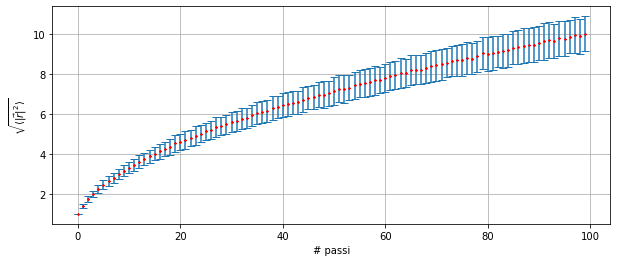

In [15]:

Av_d= numpy.zeros( 100 )
dev_Av_d= numpy.zeros( 100 )

for i in range( 100 ):
    Av_d[i]= Media( data_d[i], data_d[i].size-1 )
    dev_Av_d[i]= Err( data_d[i], data_d[i].size-1 )
    
N = numpy.arange ( 100 )    

plt.figure(figsize=(10, 4))
plt.errorbar( N, numpy.sqrt(Av_d), yerr= numpy.sqrt(dev_Av_d), capsize= 4, marker= '*', mfc= 'red', 
              mec= 'red', ms= 2, linestyle= "none")
plt.xlabel('# passi')
plt.ylabel(r'$\sqrt{\langle |\vec{r}|^2 \rangle}$')
plt.grid(True)
plt.show()


### - continuo ($\rho$,$\theta$,$\phi$,a)
Analogamente per il caso continuo.

In [16]:

data_c = pandas.read_csv('2.2/sim_continuo_out.txt', delimiter= "\t", header = None)


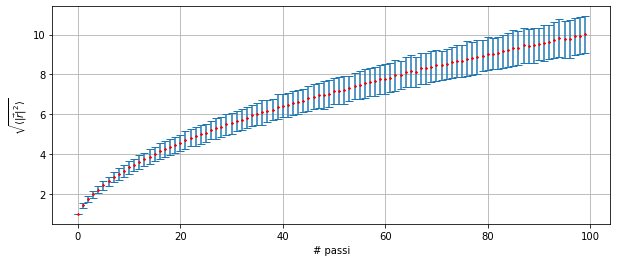

In [17]:

Av_c= numpy.zeros( 100 )
dev_Av_c= numpy.zeros( 100 )

for i in range( 100 ):
    Av_c[i]= Media( data_c[i], data_c[i].size-1 )
    dev_Av_c[i]= Err( data_c[i], data_c[i].size-1 )

plt.figure(figsize=(10, 4))
plt.errorbar( N, numpy.sqrt(Av_c), yerr= numpy.sqrt(dev_Av_c), capsize= 4, marker= '*', mfc= 'red', 
              mec= 'red', ms= 2, linestyle= "none")
plt.xlabel('# passi')
plt.ylabel(r'$\sqrt{\langle |\vec{r}|^2 \rangle}$')
plt.grid(True)
plt.show()


Entrambi gli andamenti proposti sono chiaramente divergenti nel numero di passi, e l'errore associato è anch'esso divergente a sottolineare l'aumento di varietà di posizioni esplorate ed esplorabili man mano che ci si allontana dal punto di partenza. 

Visti i grafici prodotti è plausibile ricondurre l'andamento osservato ad una funzione analitica nel numero di passi dall'origine effettuati.

##### - Fit dell'andamento con una funzione nota:
Si effettua un fit delle curve ottenute con un andamento del tipo $k\sqrt M$. 

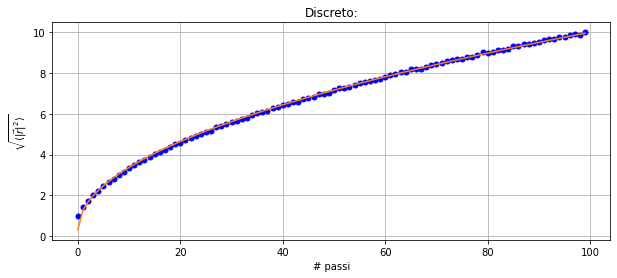

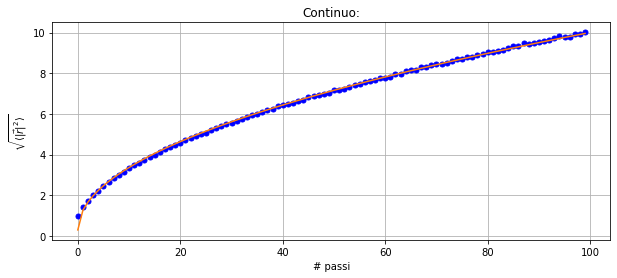

In [18]:

from scipy.optimize import curve_fit


def f (x,k,a):
    return a + k*numpy.sqrt(x)


plt.figure(figsize=(10, 4))
plt.plot( N, numpy.sqrt(Av_d), marker= 'o', mfc= 'blue', mec= 'blue', ms= 5, linestyle= "none")
popt, pcov= curve_fit(f, N, numpy.sqrt(Av_d))
plt.plot(N, f(N, *popt))
plt.xlabel('# passi')
plt.ylabel(r'$\sqrt{\langle |\vec{r}|^2 \rangle}$')
plt.title('Discreto:')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 4))
plt.plot( N, numpy.sqrt(Av_c), marker= 'o', mfc= 'blue', mec= 'blue', ms= 5, linestyle= "none")
popt, pcov= curve_fit(f, N, numpy.sqrt(Av_c))
plt.plot(N, f(N, *popt))
plt.xlabel('# passi')
plt.ylabel(r'$\sqrt{\langle |\vec{r}|^2 \rangle}$')
plt.title('Continuo:')
plt.grid(True)
plt.show()


Come si può osservare dai grafici realizzati, il fit con la funzione proposta effettivamente ben si accorda con i dati sperimentali delle distanze medie dall'origine.

Si sono rimosse le barre di errore per una migliore comprensione del fit.